# Principal Component Analysis (PCA)
Análise dos Principais Componentes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [18]:
#Iris
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [22]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [27]:
X = iris['data']
y = iris['target']

In [35]:
X.shape,y.shape

((150, 4), (150,))

In [37]:
X = StandardScaler().fit_transform(X)

In [41]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
pd.DataFrame(X,columns=iris['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [48]:
pca = PCA(n_components=2)

In [50]:
pc = pca.fit_transform(X)

In [65]:
pc[y==0,0]

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344])

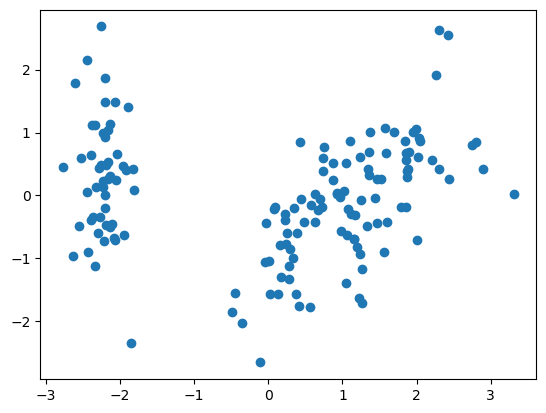

In [67]:
plt.scatter(pc[:,0],pc[:,1])
plt.show()

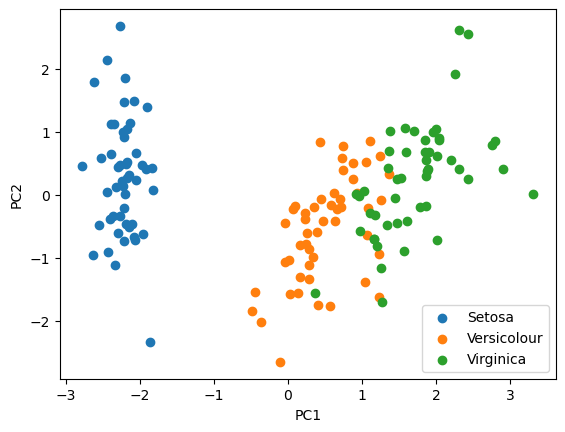

In [73]:
plt.scatter(pc[y==0,0],pc[y==0,1], label='Setosa')
plt.scatter(pc[y==1,0],pc[y==1,1], label='Versicolour')
plt.scatter(pc[y==2,0],pc[y==2,1], label='Virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend()
plt.show()

In [75]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [77]:
sum(pca.explained_variance_ratio_)

0.9581320720000165

# Dígitos

In [79]:
digitos = datasets.load_digits()
X = digitos['data']
y = digitos['target']

In [81]:
X.shape, y.shape

((1797, 64), (1797,))

Projetando 64 dimensões em apenas 2D


C:\Users\leosa\AppData\Local\Temp\ipykernel_6424\2198527900.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduzido[:,0],X_reduzido[:,1],c=y,edgecolor='black',alpha=0.6,s=80,cmap=plt.cm.get_cmap('nipy_spectral',10))


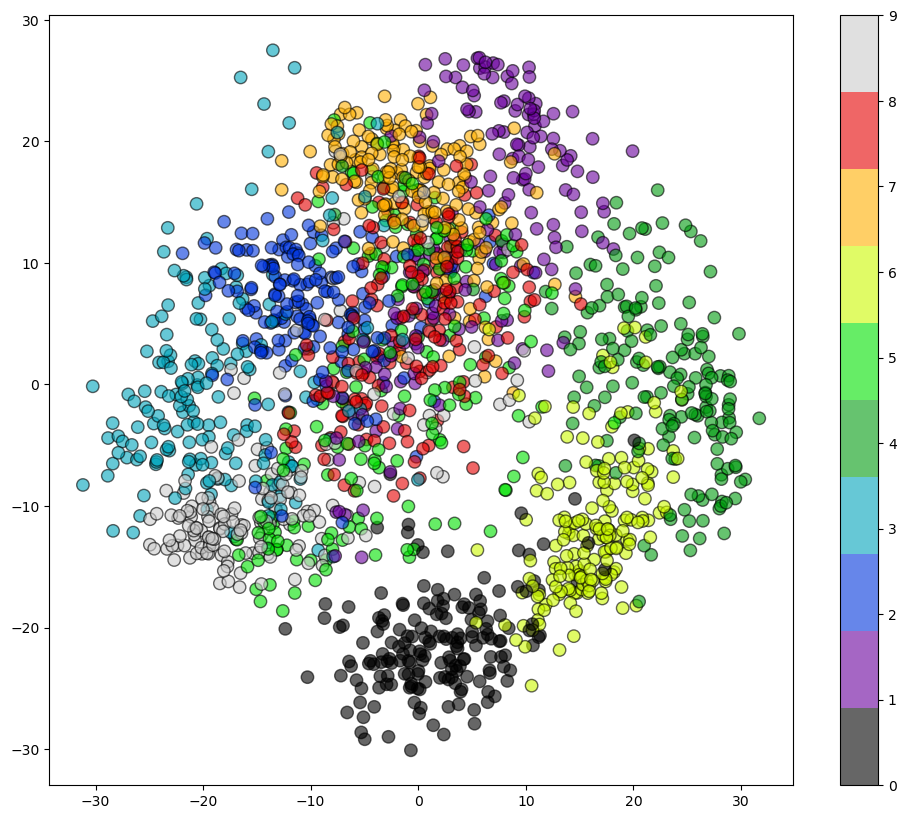

In [97]:
pca = PCA(n_components=2)
X_reduzido = pca.fit_transform(X)

print(f'Projetando {X.shape[1]} dimensões em apenas 2D')

plt.figure(figsize=(12,10))
plt.scatter(X_reduzido[:,0],X_reduzido[:,1],c=y,edgecolor='black',alpha=0.6,s=80,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

In [93]:
sum(pca.explained_variance_ratio_)

0.285093648236993

# TSNE

In [99]:
from sklearn.manifold import TSNE
tsne= TSNE(random_state=123)

X_tsne = tsne.fit_transform(X)

In [100]:
X_tsne.shape

(1797, 2)

C:\Users\leosa\AppData\Local\Temp\ipykernel_6424\976188675.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,edgecolor='black',alpha=0.6,s=80,cmap=plt.cm.get_cmap('nipy_spectral',10))


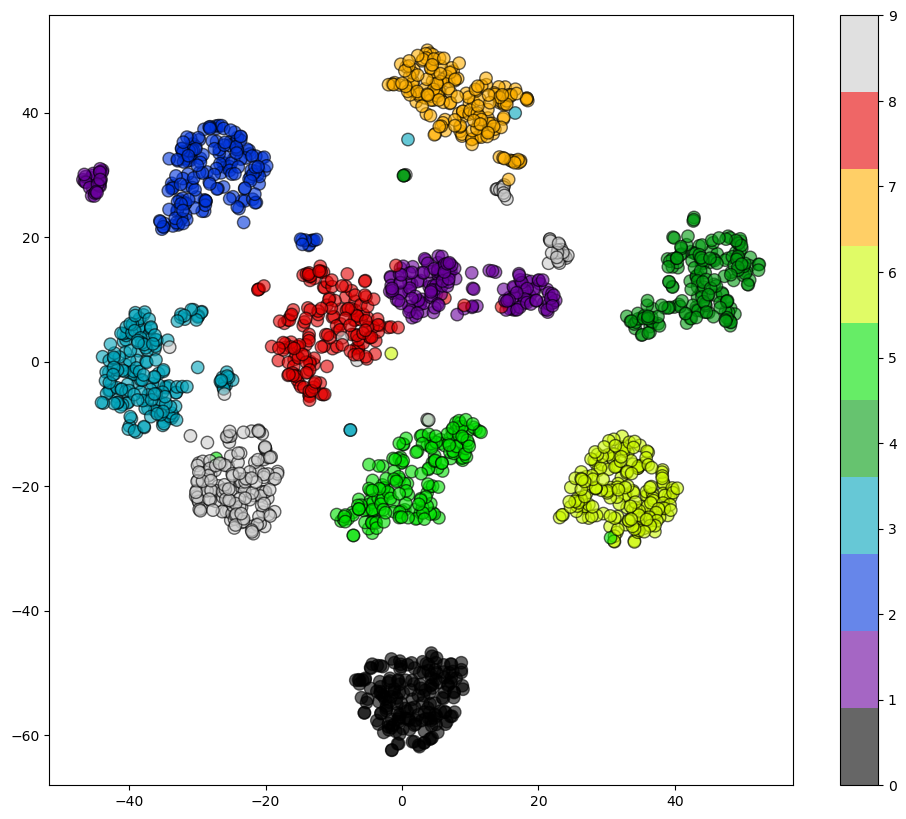

In [103]:
plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,edgecolor='black',alpha=0.6,s=80,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

In [137]:
pca = PCA(0.98)

In [139]:
pca.fit_transform(X)

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   1.09482318,
         -0.19568553,   0.08999361],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   3.19142836,
          1.53226758,   3.68811324],
       [  6.99192297,   9.95598641,  -2.95855808, ...,  -2.80824525,
          1.25387188,   0.220568  ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   4.05113112,
         -1.38270379,  -2.14851598],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   0.57909851,
          1.85969137,   1.3695873 ],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.47500261,
          0.47692739,  -1.21265099]])

In [141]:
pca.n_components_

37

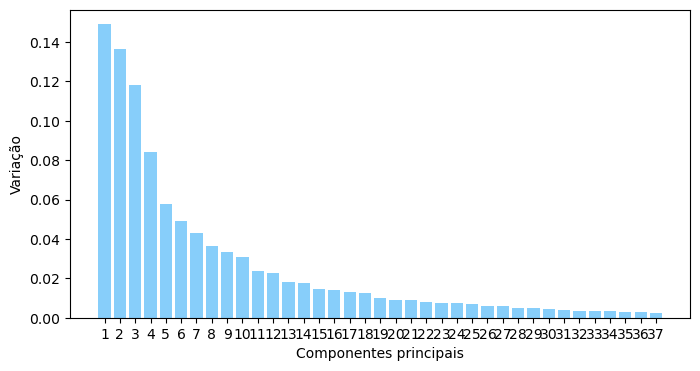

In [143]:
plt.figure(figsize=(8,4))
plt.bar(np.arange(1,pca.n_components_+1),pca.explained_variance_ratio_[:pca.n_components_], color='lightskyblue')
plt.xlabel('Componentes principais')
plt.ylabel('Variação')
plt.xticks(np.arange(1,pca.n_components_+1))
plt.show()

Fontes:
 * http://bit.ly/2NiVYCP
 * http://bit.ly/34wZ7EO